# STAT 301: Individual Assignment 3

**Group:** 26

**Group members:** 

- Sam Thorne 83910448
- Oliver Gullery 95292827
- Riddhi Battu 85855856
- Kourosh Shahbazi 87286076

## New York City Airbnb Data

Data was originally retrieved from [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data). Raw data can be found on [GitHub](https://raw.githubusercontent.com/samnthorne/FinalProject/main/data/AB_NYC_2019.csv). 

This dataset is a summary of Airbnb information in the New York City area during 2019. The data includes review information, host metrics, general metrics about the Bnb, and booking information. This is a public dataset that can be found on [insideairbnb.com](http://insideairbnb.com/).

### Importance of Analysis:

This dataset is a valuable resource for various stakeholders interested in the dynamics of the sharing economy, particularly in urban settings. There are currently over 4 million hosts and 6 million active listings on [Airbnb](https://www.searchlogistics.com/learn/statistics/airbnb-statistics/#:~:text=There%20are%20currently%20over%204,booked%20over%201%20billion%20stays). Analysts and researchers can use this data to perform comprehensive market analyses, understand customer and host behavior, and predict trends in the hospitality and tourism industry in New York City.

### Descriptive Summary:

**New York City Airbnb Dataset** has 16 attributes describing various Airbnbs throughout the New York City area in 2019. There are 48895 different Airbnb's presented in this data set. 

**Data Attribute Summary:**

|Name of attribute|Type of data|Semantics|Notes|
|---|---|---|---|
|`id`|Quantitative `dbl`|There is a unique value in each of these columns, id is essentially the index for the row|Unique value for each row, does not start at `0`.|
|`name`|Categorical variable `chr`|This is the name of the BnB that the row is about.|There are `47895` unique values in this column. Meaning it is not unique throughout the whole data set.|
|`host_id`|Quantitative variable `dbl`|This is the numerical ID for the BnB host for the row|`37457` different values in this column ranging from `2438` to `274321313`|
|`host_name`|Categorical variable `chr`|Name of the host in charge of the Bnb for the row|`11453` unique values in this row. The names are mainly just the first name of the Bnb host.|
|`neighbourhood_group`|Categorical variable `chr`|The neighbourhood are grouped together in this data. These are general community groupings in the New York area|There are 5 unique values in this column. These values include: `Brooklyn`, `Manhattan`, `Queens`, `Staten Island` and `Bronx`.|
|`neighbourhood`|Categorical variable `chr`|This is the neighbourhood in New York the Airbnb can be found in|There are 221 unique values in this column. They are represented as strings where each word begins with a capital.|
|`latitude`|Quantitative variable `dbl`|This is the latitude location of the BnB represented in each row|Ranges from `40.50` to `40.91`. All within the New York area.|
|`longitude`|Quantitative variable `dbl`|This is the longitude of the Bnb represented in each row|Ranges from`-74.24` to `73.71`|
|`room_type`|Categorical variable `chr`|This is the type of room at you can rent out through each Bnb|Has 3 unique values. These values include: `Private room`, `Entire home/apt`, and `Shared room`.|
|`price`|Quantitative variable `dbl`|This is how much is costs to stay with each Airbnb for a single night|Ranges from `0.0` to `10000.0`. All values are a rounded whole number.|
|`minimum_nights`|Quantitative variable `dbl`|This is the minimum amount of nights someone must book to stay at this bnb.|Ranges from `1.00` to `1250.0`, all values are rounded whole numbers.|
|`number_of_reviews`|Quantitative variable `dbl`|This is the number of reviews this Airbnb recieved prior to this study|Ranges from `0.0` to `629.00`. All values are whole numbers.|
|`last_review`|Date `date`|This is the day that the last review (prior to this study) was posted.|Values range from `2011`, to `2019`. There are also `10052` NA values in this column.|
|`reviews_per_month`|Quantitative variable `dbl`|This is the average number of reviews the Bnb recieves each month|Ranges from `0.010` to `58.5`. With a mean of `1.373` reviews each month.|
|`calculated_host_listings_count`|Quantitative variable `dbl`|This is the number of other Airbnbs this host runs.|Ranges from `1` to `327`. Most of this column is made up of 1's (the host runs only one bnb and it is the bnb represented in that row.|
|`availability_365`|Quantitative variable `dbl`|This is the number of days available for booking (not yet booked when data was collected).|Ranges from `0` to `365`. The average amount of days available is `112`.|

<span style = "color: gray;"> **Table 1:** Descriptive summary of all attributes in the New York City AirBnb dataset</span>

### ***Question of interest:***
> *Using the location, availability, room type, & host information, how much should a single night stay at the Airbnb cost?*

This question is aimed towards new Airbnb hosts who are unsure about how much a stay at their bnb should cost. My goal is to build a predictive model that will predict an appropriate price for a nights stay at an Airbnb based on the variables listed above.

## Reading the data in using R:

To run this notebook `tidyverse` must be installed. The data set is being read in from [GitHub](https://raw.githubusercontent.com/samnthorne/FinalProject/main/data/AB_NYC_2019.csv) despite originally being found on [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data).

In [43]:
# loading necessary libraries:
library(tidyverse)
library(glmnet)
library(tidymodels)
library(mltools)
library(reshape2)


# Removing warning messages from notebook:
options(warn=-1)

# Reading in the data
data_og <- read_csv('https://raw.githubusercontent.com/samnthorne/FinalProject/main/data/AB_NYC_2019.csv')
head(data)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Rows: 48895 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): name, host_name, neighbourhood_group, neighbourhood, room_type
dbl  (10): id, host_id, latitude, longitude, price, minimum_nights, number_o...
date  (1): last_review

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Clean & quiet apt home by the park,John,Brooklyn,40.64749,-73.97237,Private room,149,1,6,365
Skylit Midtown Castle,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,2,355
THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,40.80902,-73.94190,Private room,150,3,1,365
Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,1,194
Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,1,0
Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,1,129


<span style = "color: gray;"> **Table 2:** First few rows of entire New York City AirBnb Data</span>

**Data dimensions:**

In [44]:
print(paste("The data set has dimensions of",dim(data)[1], "by", dim(data)[2]))

[1] "The data set has dimensions of 48858 by 10"


## Data Cleaning

This data set is quite clean to begin with. It is already in long format for building the model and the visualizations below. The data cleaning completed here will largely be condensing the data down to what is going to be used for the analysis. I will also be re-labelling many of the `chr` variables as `fct` variables.

### Dropping attributes:

As discussed in Assignment1 I am going to be dropping columns `id`, `host_id`, `neighbourhood`, `latitude`, `longitude`, `number_of_reviews`, `last_review`, and `reviews_per_month`. 
- The `id` and `host_id` column do not have any semantic meaning so I chose to drop them. Neither of these attributes should not alter my ability to predict an appropriate AirBnb price due to all the values in these columns being arbitrary.
- The columns `neighbourhood`, `latitude`, and `longitude` all have to do with the location of the Bnb. I am leaving the column `neighbourhood_group` to represent the location of the Bnb and dropping these columns to avoid multi-collinearity in the model. Each of these variables share semantic meaning and I feel only one attribute should remain.
- The columns `number_of_reviews`, `last_review`, and `reviews_per_month` all have to do with reviews each bnb has recieved. I decided to drop these columns as this relates to the number of reviews only; there is no sentiment of these reviews represented in this data. People have a tendency to leave reviews when they need to vent or if they are giving praise after a positive experience. These two extremes are represented in the same way when only looking at review numbers. To avoid these columns nullifying the models predictions they are all going to be dropped.

Additionally, I hope to test if the attribute `name` benefits the prediction model or not. I will complete this analysis when building the model for Assignment 3. I am unsure about how this attribute is going to effect the model because it is a natural language text column. Without natural language processing I am quite certain that this attribute will not aid the model very much.

In [45]:
# dropping columns I am not using:

data <- data_og %>%
    select(-id, -host_id, -neighbourhood, -number_of_reviews, -last_review, -reviews_per_month)
head(data)

name,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Clean & quiet apt home by the park,John,Brooklyn,40.64749,-73.97237,Private room,149,1,6,365
Skylit Midtown Castle,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,2,355
THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,40.80902,-73.94190,Private room,150,3,1,365
Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,1,194
Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,1,0
Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,1,129


<span style = "color: gray;"> **Table 3:** First 5 rows of shrunken New York City AirBnb data</span>

### Removing Na values:

During assignment 1, I found there were a few columns that contained null values. These columns included `last_review` and `reviews_per_month`. Each of these columns were dropped for this analysis for reasons described above. I am going to double check if there are any other any other columns with NA values:

In [46]:
# find NA values and drop those columns?

NA_values <- tibble(Attribute = c("Name", "Host name", "Neighbourhood group", "Room type", "Price", "Minimum nights", "Number of host listings", "Availability"),
                    NAs = c(sum(is.na(data$name)), sum(is.na(data$host_name)), sum(is.na(data$neighbourhood_group)), sum(is.na(data$room_type)), sum(is.na(data$price)), sum(is.na(data$minimum_nights)), sum(is.na(data$calculated_host_listings_count)), sum(is.na(data$availability_365)))
                    )
NA_values

Attribute,NAs
<chr>,<int>
Name,16
Host name,21
Neighbourhood group,0
Room type,0
Price,0
Minimum nights,0
Number of host listings,0
Availability,0


<span style = "color: gray;"> **Table 4:** Number of NA values remaining in the condensed New York City Airbnb data</span>

***What to do with these few NA values?***

There are a few NA values found in both `name` and `host_name` in this data set. 

This is a small number of null values in the data being used. To complete this analysis, any rows containing NA values are going to be dropped for simplicity. This makes up only 0.07% of the total rows in the data so dropping these few rows does not drastically alter the size of the sample being assessed.

In [47]:
# Dropping rows containing NA values.

data <- na.omit(data)
print(paste("Without NA values the dimensions of the data are", dim(data)[1], "by", dim(data)[2]))

[1] "Without NA values the dimensions of the data are 48858 by 10"


### Changing `chr` to `fct`:

For some of the categorical variables in this data set (`neighbourhood_group`, `room_type`) there are several distinct categories represented in the column. These variables have a fixed, known set of possibilities that are always going to be the same. 

The columns `name` and `host_name` are also categorical but these columns do not have a fixed set of possible values. New data can, and likely would, have completely different values in these columns so I will be leaving these columns as `chr` type.

In [48]:
data$neighbourhood_group <- as.factor(data$neighbourhood_group)
data$room_type <- as.factor(data$room_type)

## Exploratory Data Analysis:

Before beginning my visualization I am going to be doing some exploratory analysis to determine which attributes should be further visualized using said visualization.

### Attribute Summary:

In [49]:
summary(data)

     name            host_name            neighbourhood_group    latitude    
 Length:48858       Length:48858       Bronx        : 1089    Min.   :40.50  
 Class :character   Class :character   Brooklyn     :20089    1st Qu.:40.69  
 Mode  :character   Mode  :character   Manhattan    :21643    Median :40.72  
                                       Queens       : 5664    Mean   :40.73  
                                       Staten Island:  373    3rd Qu.:40.76  
                                                              Max.   :40.91  
   longitude                room_type         price         minimum_nights    
 Min.   :-74.24   Entire home/apt:25393   Min.   :    0.0   Min.   :   1.000  
 1st Qu.:-73.98   Private room   :22306   1st Qu.:   69.0   1st Qu.:   1.000  
 Median :-73.96   Shared room    : 1159   Median :  106.0   Median :   3.000  
 Mean   :-73.95                           Mean   :  152.7   Mean   :   7.012  
 3rd Qu.:-73.94                           3rd Qu.:  175.0  

A couple points to note about the above summary:
- The categorical level `Staten Island` in the column `neighbourhood_group` has much fewer instances than the other levels seen in this column.
- The categorical level `Shared room` in the column `room_type` also has fewer 

### Correlation Matrix with Numerical Variables

**Objectives:** We can create a correlation matrix (`Figure 1`) with the numerical variables in our dataset (*latitude, longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365*). This matrix will allow us to identify potential linear correlations between price and other numerical variables. Variables with strong correlation with price could serve as valuable predictors in our regression model. 

**Observations:** The correlation matrix revealed that none of the numerical variables had a substantial correlation with price, with the *strongest correlation coefficient being -0.15*. This indicates that these variables may not serve as reliable linear predictors of price. However, we should note that these features could still be useful with alternative analytical methods which might uncover more complex relationships not captured by linear models. 

**Research Question:** This visualization can help us address our research question which aims to build a Multiple Linear Regression (MLR) model with features which can help us predict variability in price. The observed weak correlations suggest that these variables alone might not significantly enhance the predictive capacity of our linear model. 

# A tibble: 8 × 2
  variable                       correlation_with_price
  <chr>                                           <dbl>
1 longitude                                     -0.155 
2 number_of_reviews                             -0.0359
3 reviews_per_month                             -0.0306
4 minimum_nights                                 0.0255
5 latitude                                       0.0313
6 calculated_host_listings_count                 0.0529
7 availability_365                               0.0782
8 price                                          1     


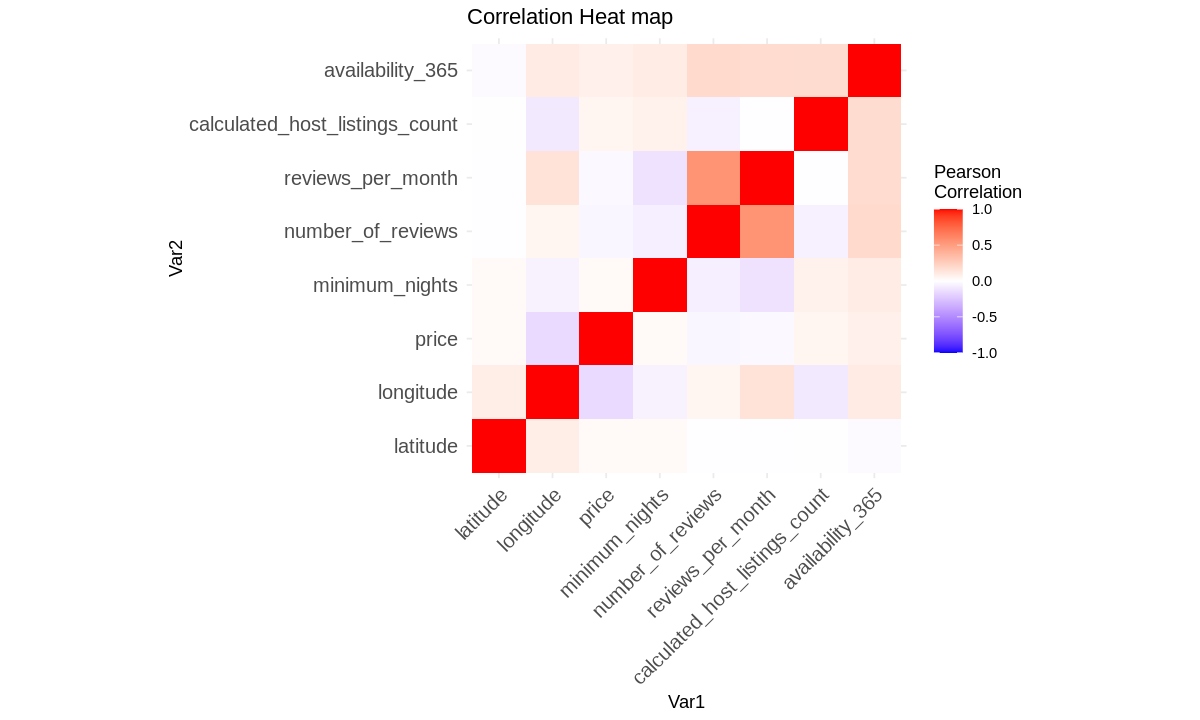

In [50]:
numerical_data <- data_og %>%
  select(latitude, longitude, price, minimum_nights, number_of_reviews, 
         reviews_per_month, calculated_host_listings_count, availability_365)


cor_matrix <- cor(numerical_data, use = "complete.obs") 


melted_cor_matrix <- melt(cor_matrix)

# Create the heatmap
correlation_heat_map <- ggplot(melted_cor_matrix, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),
        axis.text.y = element_text(size = 12)) +
  coord_fixed() + ggtitle("Correlation Heat map") # for square cells


price_correlations <- cor_matrix[,"price"]
price_correlations_df <- as.data.frame(price_correlations)


tidy_price_correlations <- tibble(
  variable = rownames(price_correlations_df),
  correlation_with_price = price_correlations
)


ordered_price_correlations <- tidy_price_correlations %>%
  arrange(correlation_with_price)


print(ordered_price_correlations)
correlation_heat_map

## Visualization:

The goal of this analysis is to determine which variables are most influential when setting a price for a nights stay at an Airbnb. The below visualization explores the any relationships price may have with other attributes regarding the Airbnb. This visualization is going to focus on the `room_type`, and `neighbourhood_group` in relation to the price of a single nights stay. 

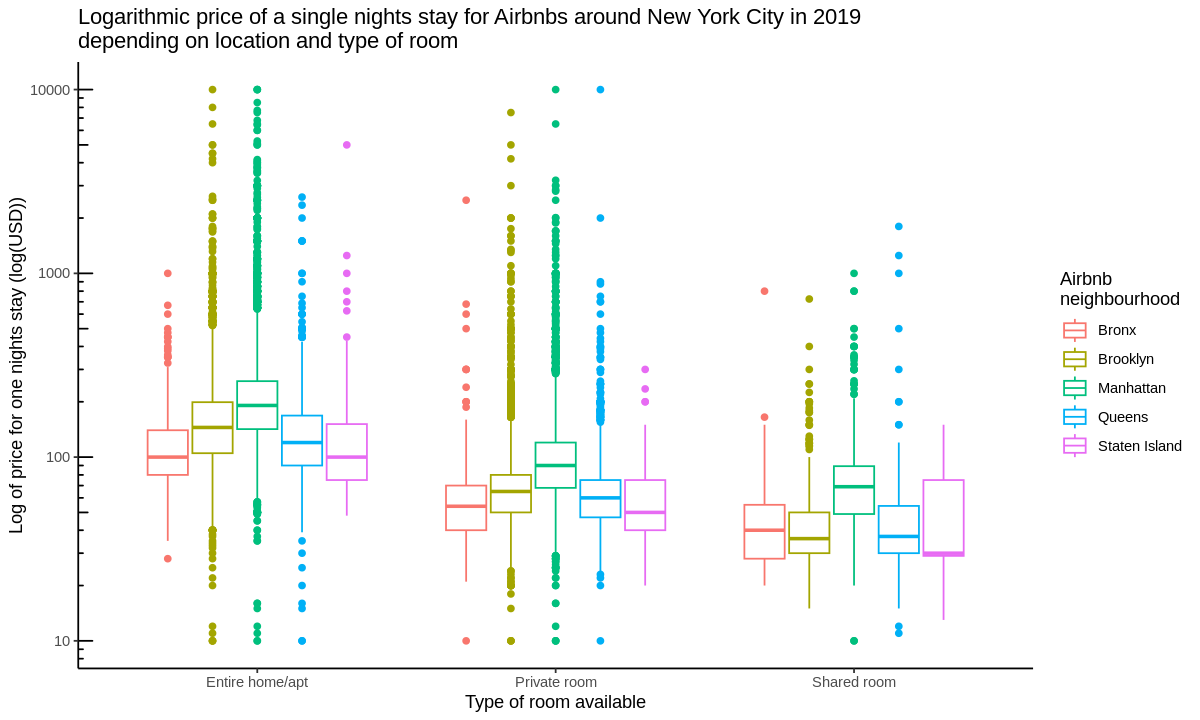

In [51]:
options(repr.plot.width = 10, repr.plot.height = 6)

visualization <- data %>%
    ggplot(aes(color = neighbourhood_group, 
               y = price, 
               x = room_type))+
    geom_boxplot() +
    scale_y_log10() + # to better see the variation in data at lower numbers. 
    annotation_logticks(10, sides = "l", colour = 'black', scaled = TRUE) +
    ggtitle("Logarithmic price of a single nights stay for Airbnbs around New York City in 2019 \ndepending on location and type of room") +
    labs(y = "Log of price for one nights stay (log(USD))",
         x = "Type of room available") +
    scale_color_discrete(name = "Airbnb \nneighbourhood") +
    theme_classic()

visualization
# ggsave('images/Assignment2-Vis.png', plot = visualization)

<span style = "color: gray;">**Figure 1:** Distribution of log(price) based on room type and neighbourhood from New York City Airbnb data. </span>

**Justification for chosen visualization:**

Boxplots are able to show large amount of information in a way that is quite easy to interpret. From this visualization one can find the mean and quantile ranges of price for each room type - neighbourhood combination of Airbnbs. 

I chose to display the visualization with a logarithmic scale on the y-axis because the price range goes up very high (`max =  10,000`) while the majority of the points were quite a bit lower (`mean =152.7`). Using a logarithmic scale on the y-axis enables the viewer to analyze the relationships between the variables at lower price points that could be too condensed together to see on an unscaled visualization.

**Interpretation of Figure 1:**

Relationship between room type and Airbnb price:
- To stay at a `Entire home/apt` costs substantially more per night than staying in a `Private room` or a `Shared room`
- Staying in a `Private room` is also substantially more costly than staying in a `Shared room`.
- `Entire home/apt` has much more variability in its pricing than the other two room types. It does not look as substantial using the logarithmic scale but there are Airbnb prices ranging from ~10,000 USD to ~10 USD per night. 

Relationship between neighbourhoods and Airbnb price:
- The average cost to stay in an Airbnb in Manhattan is higher than any other neighbourhood no matter the type of room. 
- The least costly neighbourhood is `Staten Island` no matter the type of room.
- Each neighbourhood follows the same trends discussed in room type (`Entire home/apt` price > `Private room` price > `Shared room` price).

Overall, there are some clear trends between `room_type` and `neighbourhood_group` with `price`. This visualization confirms that these attributes will likely help to predict appropriate Airbnb pricing. Additionally, it provides insight about how the pricing of an Airbnb should change with either room type or neighbourhood.

## Methods and Plan

The goal of this analysis is to build a model that is capable of predicting an appropriate AirBnb price for a new listing. Both categorical variables and numerical variables can potentially be used to make this quantitative prediction. 

#### Proposed Method:

After splitting the data, I will complete cross validation with LASSO for variable selection. I then will use those chosen variables in a least squares multi-linear regression to train my model; I plan to use cross validation here as well to have a preview at model performance by computing RMSE for each fold. Lastly, I will evaluate the model on the test data by computing RMSE.

I am unsure about which variables are going to perform the best in my model and therefore intend to use LASSO for variable selection to optimize the multi-linear regression model. Throughout this variable selection process I plan to re-introduce the `latitude` and `longitude` variables to describe location of the bnb as these are quantitative instead of categorical like the `neighbourhood_group` attribute. The `neighbourhood_group` attribute has 5 different levels and I plan to compare how this fairs in the regression model compared to `longitude` and `latitude`. Linear regression becomes more interpretable when using quantitative variables instead of multiple dummy variables for each categorical level.

In developing this model I am hoping to accurately predict appropriate bnb pricing for new listings. One way of evaluating predictive models is to use RMSE (root mean squared error) which describes how different each prediction was from the actual values. I will be using this metric both during the training process using cross-validation and after training my model to evaluate performance on the testing split.

#### Assumptions:

In using multi-linear regression, I am making the following assumptions about the data:
1. There is a linear relation
2. Errors are independent
3. The error term distribution is normal
4. There is equal variance of each of the error terms
5. There is no multi-collinearity between the variables.

#### Potential Limitations or Weaknesses:

Linear regression can get quite complicated when there are many levels to a categorical input variable as it generates a dummy variables to represent each categorical level. I am concerned that having many multi-level categorical variables in the model will make it hard to interpret. To work around this, I plan to condense down the cateogories so there are just 2 levels (for example `room_type` can be condensed down into `shared` and `private` where the `private` category contains both `Private room` and `Entire home/apt`). Additionally, using these methods, I will likely have to drop `host_name` and `name` as they are both attributes with *many* levels (close to being completely unique). Linear regression (as we have learned in this class) does not fair well with unprocessed natural language data which is why these columns will have to be dropped.

Another potential weakness in this method is the assumption of no / little multicollinearity. The location of the bnb is something that is encoded in this dataset in many different ways. I am concerned that re-introducing `longitude` and `latitude` is going to introduce multicollinearity to the model when the `neighbourhood_group` is kept in as well. If LASSO determines these variables to be correlated, it will choose at random which variables should be included. This is a potential weakness as there is potential that the best variables are no longer going to be included in the model.

## Implementation of proposed model

#### Minor data wrangling pre-implementation

To begin implementation I am going to be addressing the limitations listed above. This includes, removing `name` and `host_name` as well as re-grouping the categorical variables to include 2 distinct classes. 

Using a [map of the New York City Area](https://nycmap360.com/nyc-boroughs-map) and my visualization above, I decided to re-assign `neighbourhood_group` values into `East` and `West` where `Staten Island` and `Manhattan` are part of the `West` and the remaining communities are part of the `East`.

Additionally, I removed the line above that removed `longitude` and `latitude` so they could be involved in the attribute selection process.

In [52]:
# Removing natural language attributes:
model_data <- data %>%
    select(-name, -host_name)

# Re-grouping neighbourhood_group to be binomial
model_data$neighbourhood_group <- str_replace(model_data$neighbourhood_group, 'Brooklyn', 'East')
model_data$neighbourhood_group <- str_replace(model_data$neighbourhood_group, 'Staten Island', 'West')
model_data$neighbourhood_group <- str_replace(model_data$neighbourhood_group, 'Manhattan', 'West')
model_data$neighbourhood_group <- str_replace(model_data$neighbourhood_group, 'Bronx', 'East')
model_data$neighbourhood_group <- str_replace(model_data$neighbourhood_group, 'Queens', 'East')

# Re-grouping room_type
model_data$room_type <- str_replace(model_data$room_type, 'Shared room', 'Shared')
model_data$room_type <- str_replace(model_data$room_type, 'Private room', 'Private')
model_data$room_type <- str_replace(model_data$room_type, 'Entire home/apt', 'Private')

#### Splitting the data:

In [53]:
# Splitting the data
data_split <- initial_split(model_data, prop = 0.7, strata = price)
data_train <- training(data_split)
data_test <- testing(data_split)

#### Attribute selection via cross-validation with LASSO

In [54]:
# Finding optimal lambda value:
bnb_model <- cv.glmnet(data_train %>%
                       select(-price) %>%
                       as.matrix(),
                       y = data_train$price,
                       alpha = 1)
# bnb_model

In [55]:
# Found that min lambda produces a smaller Mean-Squared Error.
# Going to be using min lambda from the model built above.

# Extracting used coefficients from the model above.
attributes <- coef(bnb_model,
                   s = bnb_model$lambda.min)
attributes

selected <- as_tibble(
    as.matrix(attributes),
    rownames = 'Attributes') %>%
    filter(Attributes != '(Intercept)' & abs(s1) != 0)
selected


# tidy(bnb_model)

8 x 1 sparse Matrix of class "dgCMatrix"
                                          s1
(Intercept)                    -6.948947e+04
neighbourhood_group             .           
latitude                        2.161853e+02
longitude                      -8.223942e+02
room_type                       .           
minimum_nights                  2.116348e-01
calculated_host_listings_count  1.175811e-01
availability_365                1.511875e-01

Attributes,s1
<chr>,<dbl>
latitude,216.1852539
longitude,-822.3941722
minimum_nights,0.2116348
calculated_host_listings_count,0.1175811
availability_365,0.1511875




#### Building Least Squares Model:

In [56]:
ls_model <- lm(paste("price~", paste(selected %>% pull(Attributes), collapse = " + ")),
               data = data_train)

tidy(ls_model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-6.982890e+04,2.419035e+03,-28.866430,4.713781e-181
latitude,2.188684e+02,2.411208e+01,9.077125,1.172848e-19
longitude,-8.255043e+02,2.871246e+01,-28.750734,1.225431e-179
minimum_nights,2.162192e-01,6.226778e-02,3.472409,5.164468e-04
calculated_host_listings_count,1.200134e-01,4.205899e-02,2.853454,4.327271e-03
availability_365,1.520992e-01,1.039095e-02,14.637656,2.263640e-48


<span style = "color: gray;"> **Table 5:** Simple linear regression model using attributes selected from LASSO.</span>

#### Predictions and Calculating RMSE:

In [57]:
predictions <- predict(ls_model, data_test)

rmse_val <- sqrt(mean((data_test$price - predictions)^2))
rmse_val

[1] 222.7742

In [58]:
# printing range of price to get an idea of the scale for RMSE
summary(data_test$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    69.0   106.0   153.3   175.0  8000.0 

### Interpretations of Results:

The RMSE is suggesting there is a error of ~ 240 for each prediction on the test data, this is quite large given the mean of this attribute is 151. The response variable `price` has a large range from 10000 to 0, it is likely that these extreme values are influencing the resulting RMSE.

A peculiar result can also been seen in Table 5 when analyzing p-values; particularly the p-value for the attribute `longitude` suggests this attribute is *very* significant when predicting `price` which is odd considering `latitude` is not nearly as significant. I would be interested in what kind of model would be produced if these variables were removed, would `neighbourhood_group` become significant with this multi-collinearity issue resolved?

## Discussion:

## References:

There are currently over 4 million hosts and 6 million active listings [(source)](https://www.searchlogistics.com/learn/statistics/airbnb-statistics/#:~:text=There%20are%20currently%20over%204,booked%20over%201%20billion%20stays).

[1] Introduction to Statistical Learning with Applications in R ([Linked Here](https://www.amazon.ca/Introduction-Statistical-Learning-Applications/dp/1071614177/ref=asc_df_1071614177/?tag=googleshopc0c-20&linkCode=df0&hvadid=459879753056&hvpos=&hvnetw=g&hvrand=385946665552058214&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9001553&hvtargid=pla-1147835592944&psc=1&mcid=3e5ad03efcdf31559e2b27c21942fb0b]))